In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
img_bgr = cv2.imread("/content/drive/MyDrive/Images/6/Lena.bmp")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [4]:
def RGB_TO_HSI(image):
  with np.errstate(divide='ignore', invalid='ignore'):
    image = np.float32(image)/255

    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]
    
    def calc_intensity(red, blue, green):
      return np.divide(blue + green + red, 3)

    def calc_saturation(red, blue, green):
      minimum = np.minimum(np.minimum(red, green), blue)
      saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)
      return saturation

    def calc_hue(red, blue, green):
      hue = np.copy(red)

      for i in range(0, blue.shape[0]):
        for j in range(0, blue.shape[1]):
          hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / math.sqrt((red[i][j] - green[i][j])**2 + ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
          hue[i][j] = math.acos(hue[i][j])

          if blue[i][j] <= green[i][j]:
            hue[i][j] = hue[i][j]
          else:
            hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]
          return hue

    hsi = cv2.merge((calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)))
    return hsi

Text(0.5, 1.0, 'Image: HSI')

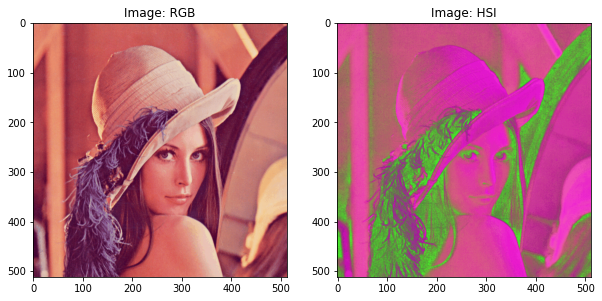

In [5]:
img_hsi = RGB_TO_HSI(img_rgb)

fig, plot = plt.subplots(1, 2, figsize = (10, 5))

plot[0].imshow(img_rgb)
plot[0].set_title("Image: RGB")

plot[1].imshow(img_hsi)
plot[1].set_title("Image: HSI")

Text(0.5, 1.0, 'Image: I Channel')

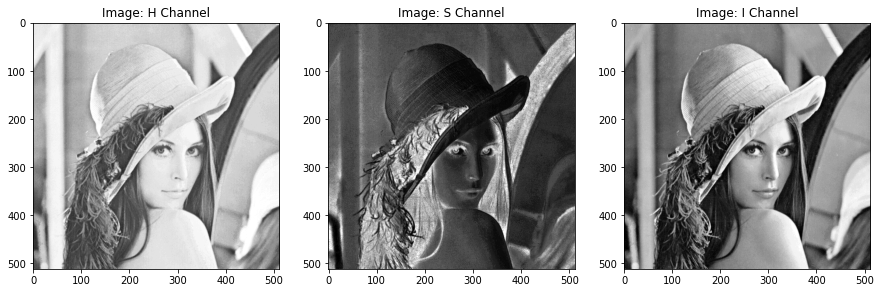

In [6]:
img_h = img_hsi[:,:,0]
img_s = img_hsi[:,:,1]
img_i = img_hsi[:,:,2]

fig, plot = plt.subplots(1, 3, figsize = (15, 5))

plot[0].imshow(img_h, cmap='gray')
plot[0].set_title("Image: H Channel")

plot[1].imshow(img_s, cmap='gray')
plot[1].set_title("Image: S Channel")

plot[2].imshow(img_i, cmap='gray')
plot[2].set_title("Image: I Channel")